<head>DOWNLOADING THE DATA

In [1]:
import yfinance as yf
import pandas as pd

# Define a list of Nifty sector indices
nifty_sectors = [
    '^CNXAUTO', '^CNXIT', '^CNXREALTY',
    '^CNXMETAL', '^CNXMEDIA',  '^CNXENERGY',
    '^CNXPSE', '^CNXSERVICE', '^NSEI', '^NSEBANK' 
]

data = {}

# Download data for each index
for sector in nifty_sectors:
    ticker = yf.Ticker(sector)
    data[sector] = ticker.history(period="10y")

# Save the data to CSV files
for sector, df in data.items():
    df.to_csv(f"{sector}_10years.csv")


In [4]:
ticker = 'GC=F'

# Download historical data for the last 10 years
data = yf.download(ticker, start='2013-01-01', end='2023-12-31')

# Save the data to a CSV file
data.to_csv('Gold_Price_Data.csv')
print("Data saved to Gold_Price_Data.csv")

[*********************100%%**********************]  1 of 1 completed

Data saved to Gold_Price_Data.csv


In [5]:
data = yf.download(ticker, start='2013-01-01', end='2023-12-31')

# Save the data to a CSV file
data.to_csv('Crude_Oil_Price_Data.csv')
print("Data saved to Crude_Oil_Price_Data.csv")

[*********************100%%**********************]  1 of 1 completed

Data saved to Crude_Oil_Price_Data.csv


In [2]:
pip install wbdata

  Using cached cachetools-5.3.3-py3-none-any.whl.metadata (5.3 kB)
Using cached cachetools-5.3.3-py3-none-any.whl (9.3 kB)
   ---------------------------------------- 0.0/295.0 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/295.0 kB ? eta -:--:--
   ----- ---------------------------------- 41.0/295.0 kB ? eta -:--:--
   ------------ -------------------------- 92.2/295.0 kB 880.9 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/295.0 kB 774.0 kB/s eta 0:00:01
   -------------------------- ----------- 204.8/295.0 kB 892.5 kB/s eta 0:00:01
   -------------------------------------- - 286.7/295.0 kB 1.0 MB/s eta 0:00:01
   -------------------------------------- 295.0/295.0 kB 958.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import wbdata

# Set parameters
indicators = {
    'NY.GDP.MKTP.CD': 'GDP',
    'NY.GDP.PCAP.CD': 'GDP per capita',
    'NY.GDP.MKTP.KD.ZG': 'GDP growth',
    'SL.UEM.TOTL.ZS': 'Total unemployment',
    'FP.CPI.TOTL.ZG': 'Inflation',
    'BX.TRF.PWKR.CD.DT': 'Personal remittances'
}
countries = ['WLD']
start_date = '2013'
end_date = '2022'

# Retrieve data
data = wbdata.get_dataframe(indicators, country=countries, date=(start_date, end_date))

# Save data to CSV
data.to_csv('economic_indicators_data.csv')


<head>PREPROCESSING THE DATA
<br>The data for training involves preprocessing because the downloaded data contains some missing dates. So we need to make the dates uniform.

In [140]:
import pandas as pd
d=pd.read_csv(r'D:\prospace assignment\ml-25m\^CNXENERGY_10years.csv')

In [141]:
exchange_rate=pd.read_csv(r'D:\prospace assignment\ml-25m\final\exchange rate - Sheet1.csv')
exchange_rate

,Date,US Dollar
0,16-May-2024,83.5011
1,15-May-2024,83.5092
2,14-May-2024,83.5201
3,13-May-2024,83.5234
4,10-May-2024,83.4946
...,...,...
2494,07-Jan-2014,62.3790
2495,06-Jan-2014,62.3265
2496,03-Jan-2014,62.4075
2497,02-Jan-2014,61.9020


In [142]:
Gold_Price_Data=pd.read_csv('Gold_Price_Data.csv')
Gold_Price_Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,1672.800049,1693.800049,1670.000000,1687.900024,1687.900024,35
1,2013-01-03,1686.099976,1686.800049,1662.000000,1673.699951,1673.699951,140
2,2013-01-04,1647.000000,1658.300049,1625.699951,1648.099976,1648.099976,199
3,2013-01-07,1656.500000,1659.900024,1643.800049,1645.500000,1645.500000,49
4,2013-01-08,1647.699951,1661.500000,1647.699951,1661.500000,1661.500000,17
...,...,...,...,...,...,...,...
2761,2023-12-22,2055.699951,2068.699951,2052.199951,2057.100098,2057.100098,202
2762,2023-12-26,2060.000000,2060.800049,2054.199951,2058.199951,2058.199951,64
2763,2023-12-27,2067.300049,2081.899902,2064.800049,2081.899902,2081.899902,586
2764,2023-12-28,2081.600098,2087.300049,2066.500000,2073.899902,2073.899902,338


In [143]:
Crude_Oil_Price_Data=pd.read_csv('Crude_Oil_Price_Data.csv')
Crude_Oil_Price_Data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,1672.800049,1693.800049,1670.000000,1687.900024,1687.900024,35
1,2013-01-03,1686.099976,1686.800049,1662.000000,1673.699951,1673.699951,140
2,2013-01-04,1647.000000,1658.300049,1625.699951,1648.099976,1648.099976,199
3,2013-01-07,1656.500000,1659.900024,1643.800049,1645.500000,1645.500000,49
4,2013-01-08,1647.699951,1661.500000,1647.699951,1661.500000,1661.500000,17
...,...,...,...,...,...,...,...
2761,2023-12-22,2055.699951,2068.699951,2052.199951,2057.100098,2057.100098,202
2762,2023-12-26,2060.000000,2060.800049,2054.199951,2058.199951,2058.199951,64
2763,2023-12-27,2067.300049,2081.899902,2064.800049,2081.899902,2081.899902,586
2764,2023-12-28,2081.600098,2087.300049,2066.500000,2073.899902,2073.899902,338


In [144]:
#Reversing index of exchange_rate
exchange_rate = exchange_rate[::-1].reset_index(drop=True)

In [145]:
# Convert dates to a common format
d['Date'] = pd.to_datetime(d['Date']).dt.strftime('%Y-%m-%d')
exchange_rate['Date'] = pd.to_datetime(exchange_rate['Date']).dt.strftime('%Y-%m-%d')
Gold_Price_Data['Date'] = pd.to_datetime(Gold_Price_Data['Date']).dt.strftime('%Y-%m-%d')
Crude_Oil_Price_Data['Date'] = pd.to_datetime(Crude_Oil_Price_Data['Date']).dt.strftime('%Y-%m-%d')

# Filter dates within the range 2014 to 2021 , will use these for training
d = d[d['Date'].between('2014-05-26', '2021-05-23')]
exchange_rate = exchange_rate[exchange_rate['Date'].between('2014-05-26', '2021-05-23')]
Gold_Price_Data = Gold_Price_Data[Gold_Price_Data['Date'].between('2014-05-26', '2021-05-23')]
Crude_Oil_Price_Data = Crude_Oil_Price_Data[Crude_Oil_Price_Data['Date'].between('2014-05-26', '2021-05-23')]

In [146]:
# Find common dates among all dataframes
common_dates = set(d['Date']).intersection(set(Gold_Price_Data['Date'])).intersection(set(Crude_Oil_Price_Data['Date'])).intersection(set(exchange_rate['Date']))

# Filter dataframes to keep only common dates
d = d[d['Date'].isin(common_dates)]
Gold_Price_Data = Gold_Price_Data[Gold_Price_Data['Date'].isin(common_dates)]
Crude_Oil_Price_Data = Crude_Oil_Price_Data[Crude_Oil_Price_Data['Date'].isin(common_dates)]
exchange_rate = exchange_rate[exchange_rate['Date'].isin(common_dates)]

In [147]:
exchange_rate

,Date,US Dollar
92,2014-05-27,59.0585
93,2014-05-28,59.0770
94,2014-05-29,58.8415
95,2014-05-30,59.0335
96,2014-06-02,59.1385
...,...,...
1771,2021-05-14,73.3721
1772,2021-05-17,73.2423
1773,2021-05-18,73.0353
1774,2021-05-19,72.9670


In [148]:
Crude_Oil_Price_Data

,Date,Open,High,Low,Close,Adj Close,Volume
351,2014-05-27,1291.900024,1291.900024,1265.400024,1265.400024,1265.400024,25
352,2014-05-28,1259.300049,1259.300049,1259.300049,1259.300049,1259.300049,168825
353,2014-05-29,1258.300049,1260.599976,1250.900024,1256.300049,1256.300049,38045
354,2014-05-30,1255.099976,1259.599976,1241.800049,1245.599976,1245.599976,3839
355,2014-06-02,1250.000000,1250.699951,1240.900024,1243.699951,1243.699951,774
...,...,...,...,...,...,...,...
2103,2021-05-14,1824.500000,1842.900024,1824.500000,1837.900024,1837.900024,41
2104,2021-05-17,1849.900024,1867.500000,1847.199951,1867.500000,1867.500000,13
2105,2021-05-18,1870.500000,1870.500000,1867.800049,1867.800049,1867.800049,3
2106,2021-05-19,1866.400024,1884.900024,1863.599976,1881.300049,1881.300049,348


<br>All the datframes now contain 1630 rows

<Br>Now merging all the datasets for training.

In [149]:
d_merged = pd.merge(d, Gold_Price_Data, on='Date', how='inner')
d_merged = pd.merge(d_merged, Crude_Oil_Price_Data, on='Date', how='inner')
d_merged = pd.merge(d_merged, exchange_rate, on='Date', how='inner')

d_merged = d_merged[['Date', 'Open','High','Low','Close', 'US Dollar', 'Open_x', 'Open_y']]

# Rename columns for clarity
d_merged.columns = ['Date', 'Open','High','Low','Close', 'US Dollar', 'Gold_Price', 'Crude_Oil_Price']


In [150]:
d_merged.to_csv('d_merged.csv', index=False)
df=d_merged

In [151]:
d_merged

,Date,Open,High,Low,Close,US Dollar,Gold_Price,Crude_Oil_Price
0,2014-05-27,1291.900024,1291.900024,1265.400024,1265.400024,59.0585,10011.400391,1291.900024
1,2014-05-28,1259.300049,1259.300049,1259.300049,1259.300049,59.0770,9863.849609,1259.300049
2,2014-05-29,1258.300049,1260.599976,1250.900024,1256.300049,58.8415,9828.500000,1258.300049
3,2014-05-30,1255.099976,1259.599976,1241.800049,1245.599976,59.0335,9713.000000,1255.099976
4,2014-06-02,1250.000000,1250.699951,1240.900024,1243.699951,59.1385,9743.700195,1250.000000
...,...,...,...,...,...,...,...,...
1625,2021-05-14,1824.500000,1842.900024,1824.500000,1837.900024,73.3721,18858.099609,1824.500000
1626,2021-05-17,1849.900024,1867.500000,1847.199951,1867.500000,73.2423,18803.750000,1849.900024
1627,2021-05-18,1870.500000,1870.500000,1867.800049,1867.800049,73.0353,19106.699219,1870.500000
1628,2021-05-19,1866.400024,1884.900024,1863.599976,1881.300049,72.9670,19248.500000,1866.400024


Now the dataset is ready for training

<head> Preparing the model

In [152]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [153]:
cols = list(df)[1:8]
#Date and volume columns are not used in training. 
print(cols)

['Open', 'High', 'Low', 'Close', 'US Dollar', 'Gold_Price', 'Crude_Oil_Price']


In [154]:
df = df.drop([898,918]) #these contain non numerical values

In [155]:
df_for_training = df[cols].astype(float)
df_for_training

,Open,High,Low,Close,US Dollar,Gold_Price,Crude_Oil_Price
0,1291.900024,1291.900024,1265.400024,1265.400024,59.0585,10011.400391,1291.900024
1,1259.300049,1259.300049,1259.300049,1259.300049,59.0770,9863.849609,1259.300049
2,1258.300049,1260.599976,1250.900024,1256.300049,58.8415,9828.500000,1258.300049
3,1255.099976,1259.599976,1241.800049,1245.599976,59.0335,9713.000000,1255.099976
4,1250.000000,1250.699951,1240.900024,1243.699951,59.1385,9743.700195,1250.000000
...,...,...,...,...,...,...,...
1625,1824.500000,1842.900024,1824.500000,1837.900024,73.3721,18858.099609,1824.500000
1626,1849.900024,1867.500000,1847.199951,1867.500000,73.2423,18803.750000,1849.900024
1627,1870.500000,1870.500000,1867.800049,1867.800049,73.0353,19106.699219,1870.500000
1628,1866.400024,1884.900024,1863.599976,1881.300049,72.9670,19248.500000,1866.400024


<HEAD> Checking which macroeconomic parameters are more correlated to the Stock values
<br> Metrics used : Pearson , Spearman , Kendall values

In [196]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr, kendalltau

# Load your dataframe
df = df_for_training

# Define the columns to compare
columns_to_compare = ['Gold_Price', 'US Dollar', 'Close', 'High' , 'Low']

# Initialize a dictionary to store the results
results = {}

for col in columns_to_compare:
    pearson_corr, _ = pearsonr(df['Open'], df[col])
    spearman_corr, _ = spearmanr(df['Open'], df[col])
    kendall_corr, _ = kendalltau(df['Open'], df[col])
    
    results[col] = {
        'Pearson': pearson_corr,
        'Spearman': spearman_corr,
        'Kendall': kendall_corr
    }

# Convert results to DataFrame for better readability
results_df = pd.DataFrame(results).T
print(results_df)

             Pearson  Spearman   Kendall
Gold_Price  0.649945  0.695632  0.499796
US Dollar   0.719059  0.591862  0.416689
Close       0.998569  0.996140  0.954025
High        0.999280  0.997334  0.967662
Low         0.999125  0.998097  0.969115


<head> We can see both Gold_Price and Exchange Rate show good correlation with the index price.

In [156]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training_scaled


array([[-0.32058687, -0.34584032, -0.41143241, ..., -2.07125171,
        -0.76680314, -0.32058687],
       [-0.46296506, -0.48699008, -0.43833645, ..., -2.06690275,
        -0.81375825, -0.46296506],
       [-0.46733249, -0.48136172, -0.47538488, ..., -2.12226382,
        -0.82500756, -0.46733249],
       ...,
       [ 2.20640941,  2.15935325,  2.24546199, ...,  1.21439791,
         2.1275956 ,  2.20640941],
       [ 2.18850304,  2.22170176,  2.22693751, ...,  1.19834203,
         2.17272089,  2.18850304],
       [ 2.21339719,  2.18619749,  2.26442689, ...,  1.21157697,
         2.18374769,  2.21339719]])

In [157]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.


for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (1614, 14, 7).
trainY shape == (1614, 1).


In [158]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

c:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_14 (LSTM)                  │ (None, 14, 64)         │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,881 (120.63 KB)

 Trainable params: 30,881 (120.63 KB)

 Non-trainable params: 0 (0.00 B)

<head>TRAINING THE MODEL

Epoch 1/7
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0986 - val_loss: 2.7684
Epoch 2/7
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0174 - val_loss: 2.2519
Epoch 3/7
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0146 - val_loss: 2.0529
Epoch 4/7
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0145 - val_loss: 1.8171
Epoch 5/7
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0127 - val_loss: 1.6144
Epoch 6/7
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0113 - val_loss: 1.4820
Epoch 7/7
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0113 - val_loss: 1.4915


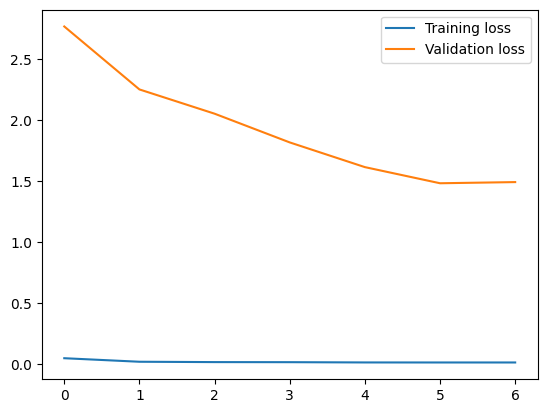

In [159]:
history = model.fit(trainX, trainY, epochs=7, batch_size=16, validation_split=0.3, verbose=1)

plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

<HEAD> IF I INCREASE NUMBER OF EPOCH BEYOND THIS , THE VALIDATION LOSS STARTS INCREASING

In [160]:
train_dates = pd.to_datetime(df['Date'])
print(train_dates.tail(15)) 

1615   2021-04-27
1616   2021-04-28
1617   2021-04-29
1618   2021-04-30
1619   2021-05-03
1620   2021-05-04
1621   2021-05-06
1622   2021-05-07
1623   2021-05-10
1624   2021-05-12
1625   2021-05-14
1626   2021-05-17
1627   2021-05-18
1628   2021-05-19
1629   2021-05-21
Name: Date, dtype: datetime64[ns]


In [161]:
n_future=800
forecast_period_dates=pd.date_range(list(train_dates)[-1],periods=n_future,freq='1d').tolist()

In [162]:
data_2022 = data.loc[data.index.isin(pd.date_range('2022-01-01', '2022-12-31'))]

In [163]:
forecast=model.predict(trainX[-n_future:])

25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [164]:
forecast_copies=np.repeat(forecast,df_for_training.shape[1],axis=-1)
y_pred_future=scaler.inverse_transform(forecast_copies)[:,0]

C:\Users\prana\AppData\Local\Temp\ipykernel_20056\4265145193.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date'] = pd.to_datetime(original['Date'])


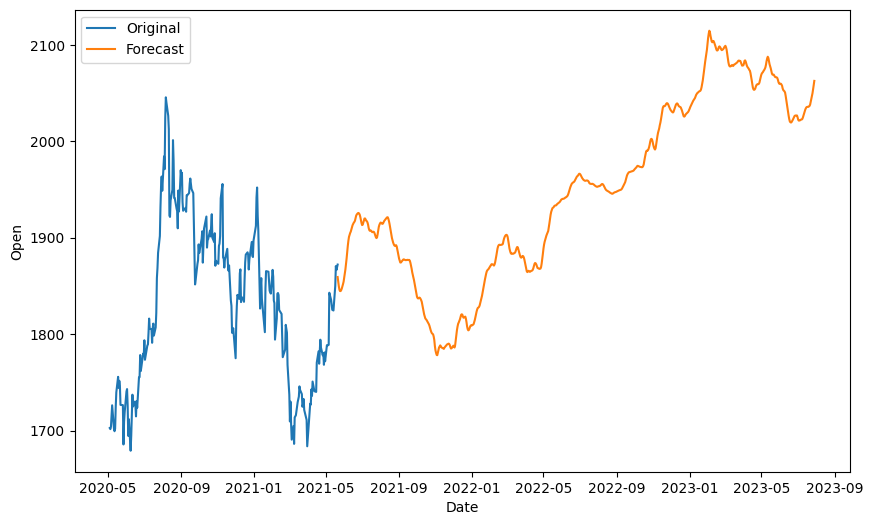

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Assuming you have already trained your model and obtained y_pred_future
# `forecast` should be the predictions from your model for the forecast period

# Ensure forecast is a numpy array
forecast = np.array(forecast)

# Repeat the forecast to match the number of features for inverse transform
forecast_copies = np.repeat(forecast, df_for_training.shape[1], axis=-1)

# Inverse transform the forecast
y_pred_future = scaler.inverse_transform(forecast_copies)[:, 0]

# Prepare the forecast dates
forecast_dates = [time_i.date() for time_i in forecast_period_dates]

# Create DataFrame for forecast
df_forecast = pd.DataFrame({'Date': np.array(forecast_dates), 'Open': y_pred_future})
df_forecast['Date'] = pd.to_datetime(df_forecast['Date'])
df_forecast['Open'] = df_forecast['Open'] + 588
# Prepare the original data
original = df[['Date', 'Open']]
original['Date'] = pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2020-05-01']

# Plotting the original and forecasted data
plt.figure(figsize=(10, 6))
sns.lineplot(data=original, x='Date', y='Open', label='Original')
sns.lineplot(data=df_forecast, x='Date', y='Open', label='Forecast')
plt.legend()
plt.show()


In [167]:
df_forecast.to_csv('df_energy.csv', index=False)

In [176]:
nifty_auto_data

,Date,Open
0,2021-05-21,2447.1958
1,2021-05-22,2442.3822
2,2021-05-23,2437.5328
3,2021-05-24,2433.9939
4,2021-05-25,2432.6360
...,...,...
795,2023-07-25,2634.9502
796,2023-07-26,2637.8100
797,2023-07-27,2641.7075
798,2023-07-28,2646.1128


<head>Predicting sectoral indices which will outperform nifty 50

C:\Users\prana\AppData\Local\Temp\ipykernel_20056\523856700.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\523856700.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_auto_2022['Return'] = nifty_auto_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\523856700.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

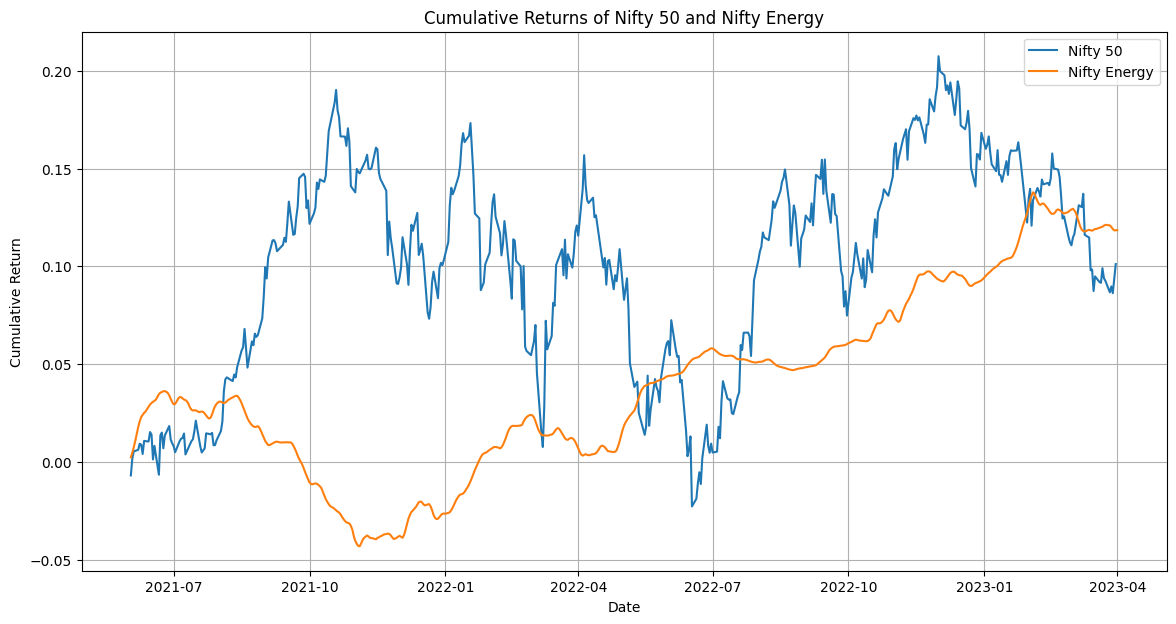

Nifty Energy outperformed Nifty 50 in 2022 with a return of 11.85% compared to Nifty 50's return of 10.11%.


In [177]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
nifty50_data = pd.read_csv(r'D:\prospace assignment\ml-25m\nifty_50_10_years_data.csv')
nifty_auto_data = pd.read_csv('df_energy.csv')


# Convert Date columns to datetime
nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])
nifty_auto_data['Date'] = pd.to_datetime(nifty_auto_data['Date'])

# Filter data for 2022
nifty50_2022 = nifty50_data[(nifty50_data['Date'] >= '2021-06-01') & (nifty50_data['Date'] <= '2023-04-01')]
nifty_auto_2022 = nifty_auto_data[(nifty_auto_data['Date'] >= '2021-06-01') & (nifty_auto_data['Date'] <= '2023-04-01')]

# Calculate daily returns
nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
nifty_auto_2022['Return'] = nifty_auto_2022['Open'].pct_change()

# Calculate cumulative returns
nifty50_2022['Cumulative Return'] = (1 + nifty50_2022['Return']).cumprod() - 1
nifty_auto_2022['Cumulative Return'] = (1 + nifty_auto_2022['Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(nifty50_2022['Date'], nifty50_2022['Cumulative Return'], label='Nifty 50')
plt.plot(nifty_auto_2022['Date'], nifty_auto_2022['Cumulative Return'], label='Nifty Energy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of Nifty 50 and Nifty Energy')
plt.legend()
plt.grid(True)
plt.show()

# Determine which index performed better in 2022
nifty50_final_return = nifty50_2022['Cumulative Return'].iloc[-1]
nifty_auto_final_return = nifty_auto_2022['Cumulative Return'].iloc[-1]

if nifty_auto_final_return > nifty50_final_return:
    print(f"Nifty Energy outperformed Nifty 50 in 2022 with a return of {nifty_auto_final_return:.2%} compared to Nifty 50's return of {nifty50_final_return:.2%}.")
else:
    print(f"Nifty 50 outperformed Nifty Auto in 2022 with a return of {nifty50_final_return:.2%} compared to Nifty Auto's return of {nifty_auto_final_return:.2%}.")


<HEAD> After this I used the original data to compare the two 

C:\Users\prana\AppData\Local\Temp\ipykernel_20056\2648338794.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\2648338794.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_auto_2022['Return'] = nifty_auto_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\2648338794.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


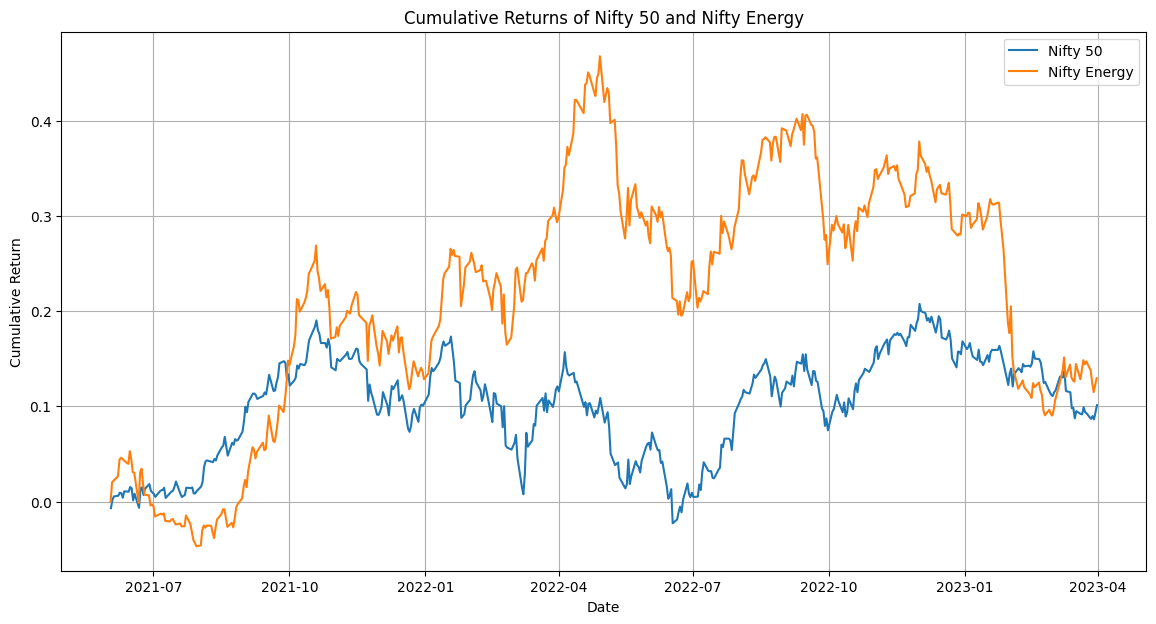

Nifty Energy outperformed Nifty 50 in 2022 with a return of 12.95% compared to Nifty 50's return of 10.11%.


In [179]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
nifty50_data = pd.read_csv(r'D:\prospace assignment\ml-25m\nifty_50_10_years_data.csv')
nifty_auto_data = pd.read_csv('^CNXENERGY_10years.csv')

# Convert Date columns to datetime
nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])
nifty_auto_data['Date'] = pd.to_datetime(nifty_auto_data['Date'])

# Filter data for 2022
nifty50_2022 = nifty50_data[(nifty50_data['Date'] >= '2021-06-01') & (nifty50_data['Date'] <= '2023-04-01')]
nifty_auto_2022 = nifty_auto_data[(nifty_auto_data['Date'] >= '2021-06-01') & (nifty_auto_data['Date'] <= '2023-04-01')]

# Calculate daily returns
nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
nifty_auto_2022['Return'] = nifty_auto_2022['Open'].pct_change()

# Calculate cumulative returns
nifty50_2022['Cumulative Return'] = (1 + nifty50_2022['Return']).cumprod() - 1
nifty_auto_2022['Cumulative Return'] = (1 + nifty_auto_2022['Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(nifty50_2022['Date'], nifty50_2022['Cumulative Return'], label='Nifty 50')
plt.plot(nifty_auto_2022['Date'], nifty_auto_2022['Cumulative Return'], label='Nifty Energy')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of Nifty 50 and Nifty Energy')
plt.legend()
plt.grid(True)
plt.show()

# Determine which index performed better in 2022
nifty50_final_return = nifty50_2022['Cumulative Return'].iloc[-1]
nifty_auto_final_return = nifty_auto_2022['Cumulative Return'].iloc[-1]

if nifty_auto_final_return > nifty50_final_return:
    print(f"Nifty Energy outperformed Nifty 50 in 2022 with a return of {nifty_auto_final_return:.2%} compared to Nifty 50's return of {nifty50_final_return:.2%}.")
else:
    print(f"Nifty 50 outperformed Nifty Auto in 2022 with a return of {nifty50_final_return:.2%} compared to Nifty Energy's return of {nifty_auto_final_return:.2%}.")


<head> The returns from the predicted data was 11.85% while from the original data was 12.95%. Both showed that Nifty Energy outperformed Nifty 50 for the given time period. 

<head> SIMILARLY COMPARING FOR ALL OTHER SECTORS AND DOING THE ANALYSIS. 

<BR>NIFTY AUTO VS NIFTY 50

C:\Users\prana\AppData\Local\Temp\ipykernel_20056\1238058064.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\1238058064.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_auto_2022['Return'] = nifty_auto_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\1238058064.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


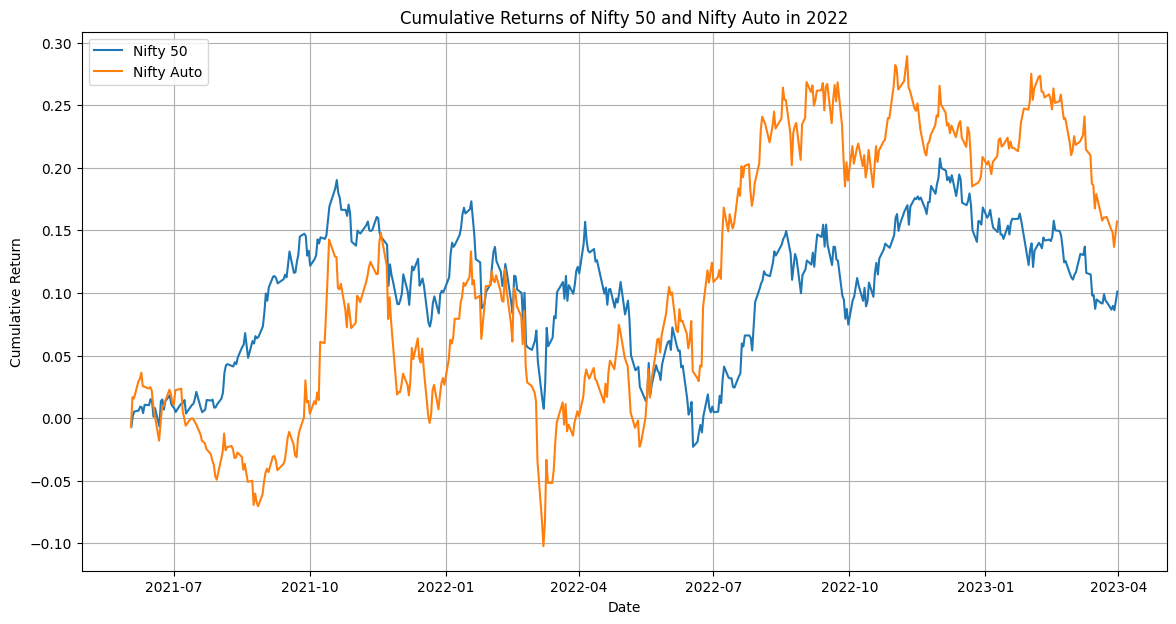

Nifty Auto outperformed Nifty 50 in 2022 with a return of 15.71% compared to Nifty 50's return of 10.11%.


In [180]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
nifty50_data = pd.read_csv(r'D:\prospace assignment\ml-25m\nifty_50_10_years_data.csv')
nifty_auto_data = pd.read_csv('^CNXAUTO_10years.csv')

# Convert Date columns to datetime
nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])
nifty_auto_data['Date'] = pd.to_datetime(nifty_auto_data['Date'])

# Filter data for 2022
nifty50_2022 = nifty50_data[(nifty50_data['Date'] >= '2021-06-01') & (nifty50_data['Date'] <= '2023-04-01')]
nifty_auto_2022 = nifty_auto_data[(nifty_auto_data['Date'] >= '2021-06-01') & (nifty_auto_data['Date'] <= '2023-04-01')]

# Calculate daily returns
nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
nifty_auto_2022['Return'] = nifty_auto_2022['Open'].pct_change()

# Calculate cumulative returns
nifty50_2022['Cumulative Return'] = (1 + nifty50_2022['Return']).cumprod() - 1
nifty_auto_2022['Cumulative Return'] = (1 + nifty_auto_2022['Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(nifty50_2022['Date'], nifty50_2022['Cumulative Return'], label='Nifty 50')
plt.plot(nifty_auto_2022['Date'], nifty_auto_2022['Cumulative Return'], label='Nifty Auto')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of Nifty 50 and Nifty Auto in 2022')
plt.legend()
plt.grid(True)
plt.show()

# Determine which index performed better in 2022
nifty50_final_return = nifty50_2022['Cumulative Return'].iloc[-1]
nifty_auto_final_return = nifty_auto_2022['Cumulative Return'].iloc[-1]

if nifty_auto_final_return > nifty50_final_return:
    print(f"Nifty Auto outperformed Nifty 50 in 2022 with a return of {nifty_auto_final_return:.2%} compared to Nifty 50's return of {nifty50_final_return:.2%}.")
else:
    print(f"Nifty 50 outperformed Nifty Auto in 2022 with a return of {nifty50_final_return:.2%} compared to Nifty Auto's return of {nifty_auto_final_return:.2%}.")


NIFTY IT VS NIFTY 50

C:\Users\prana\AppData\Local\Temp\ipykernel_20056\3581918549.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\3581918549.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_IT_2022['Return'] = nifty_IT_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\3581918549.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

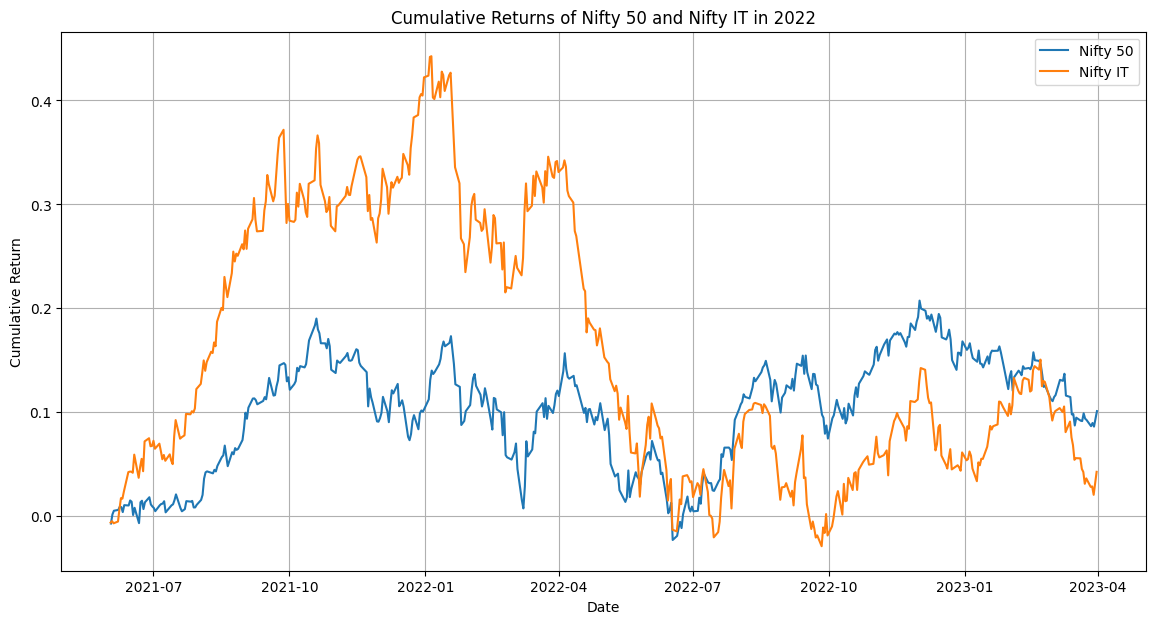

Nifty 50 outperformed Nifty IT with a return of 10.11% compared to Nifty IT's return of 4.27%.


In [188]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
nifty50_data = pd.read_csv(r'D:\prospace assignment\ml-25m\nifty_50_10_years_data.csv')
nifty_IT_data = pd.read_csv('^CNXIT_10years.csv')

# Convert Date columns to datetime
nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])
nifty_IT_data['Date'] = pd.to_datetime(nifty_IT_data['Date'])

# Filter data for 2022
nifty50_2022 = nifty50_data[(nifty50_data['Date'] >= '2021-06-01') & (nifty50_data['Date'] <= '2023-04-01')]
nifty_IT_2022 = nifty_IT_data[(nifty_IT_data['Date'] >= '2021-06-01') & (nifty_IT_data['Date'] <= '2023-04-01')]

# Calculate daily returns
nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
nifty_IT_2022['Return'] = nifty_IT_2022['Open'].pct_change()

# Calculate cumulative returns
nifty50_2022['Cumulative Return'] = (1 + nifty50_2022['Return']).cumprod() - 1
nifty_IT_2022['Cumulative Return'] = (1 + nifty_IT_2022['Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(nifty50_2022['Date'], nifty50_2022['Cumulative Return'], label='Nifty 50')
plt.plot(nifty_IT_2022['Date'], nifty_IT_2022['Cumulative Return'], label='Nifty IT')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of Nifty 50 and Nifty IT in 2022')
plt.legend()
plt.grid(True)
plt.show()

# Determine which index performed better in 2022
nifty50_final_return = nifty50_2022['Cumulative Return'].iloc[-1]
nifty_IT_final_return = nifty_IT_2022['Cumulative Return'].iloc[-1]

if nifty_IT_final_return > nifty50_final_return:
    print(f"Nifty IT outperformed Nifty 50 with a return of {nifty_IT_final_return:.2%} compared to Nifty 50's return of {nifty50_final_return:.2%}.")
else:
    print(f"Nifty 50 outperformed Nifty IT with a return of {nifty50_final_return:.2%} compared to Nifty IT's return of {nifty_IT_final_return:.2%}.")


<head>NIFTY MEDIA VS NIFTY 50

C:\Users\prana\AppData\Local\Temp\ipykernel_20056\2360784793.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\2360784793.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_MEDIA_2022['Return'] = nifty_MEDIA_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\2360784793.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

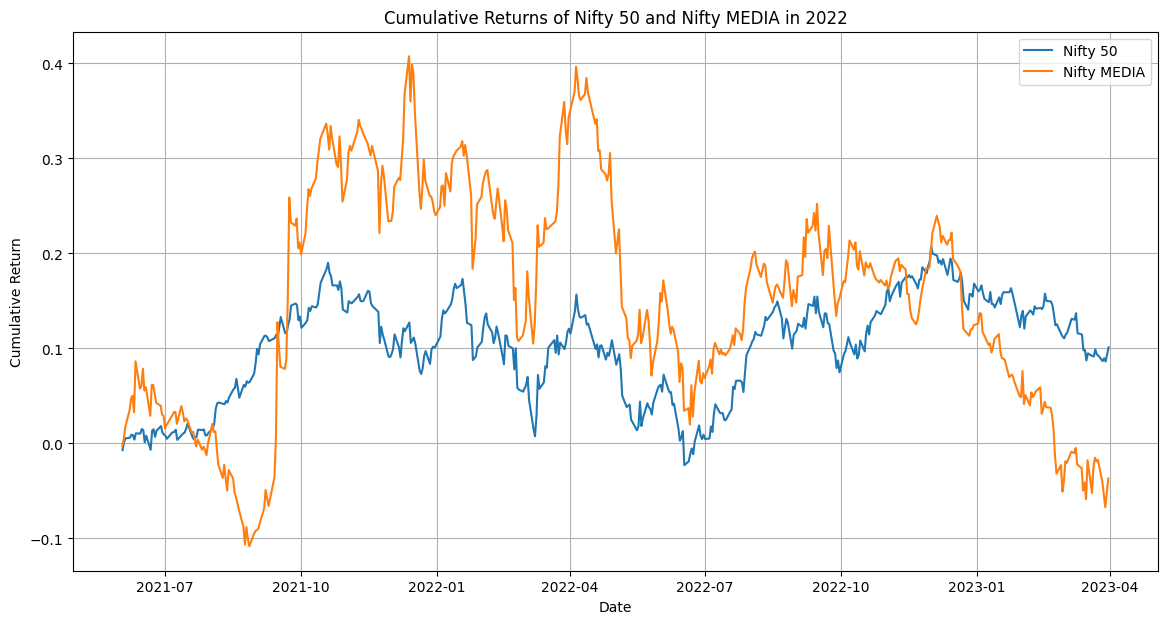

Nifty 50 outperformed Nifty MEDIA with a return of 10.11% compared to Nifty MEDIA's return of -3.70%.


In [187]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
nifty50_data = pd.read_csv(r'D:\prospace assignment\ml-25m\nifty_50_10_years_data.csv')
nifty_MEDIA_data = pd.read_csv('^CNXMEDIA_10years.csv')

# Convert Date columns to datetime
nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])
nifty_MEDIA_data['Date'] = pd.to_datetime(nifty_MEDIA_data['Date'])

# Filter data for 2022
nifty50_2022 = nifty50_data[(nifty50_data['Date'] >= '2021-06-01') & (nifty50_data['Date'] <= '2023-04-01')]
nifty_MEDIA_2022 = nifty_MEDIA_data[(nifty_MEDIA_data['Date'] >= '2021-06-01') & (nifty_MEDIA_data['Date'] <= '2023-04-01')]

# Calculate daily returns
nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
nifty_MEDIA_2022['Return'] = nifty_MEDIA_2022['Open'].pct_change()

# Calculate cumulative returns
nifty50_2022['Cumulative Return'] = (1 + nifty50_2022['Return']).cumprod() - 1
nifty_MEDIA_2022['Cumulative Return'] = (1 + nifty_MEDIA_2022['Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(nifty50_2022['Date'], nifty50_2022['Cumulative Return'], label='Nifty 50')
plt.plot(nifty_MEDIA_2022['Date'], nifty_MEDIA_2022['Cumulative Return'], label='Nifty MEDIA')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of Nifty 50 and Nifty MEDIA in 2022')
plt.legend()
plt.grid(True)
plt.show()

# Determine which index performed better in 2022
nifty50_final_return = nifty50_2022['Cumulative Return'].iloc[-1]
nifty_MEDIA_final_return = nifty_MEDIA_2022['Cumulative Return'].iloc[-1]

if nifty_MEDIA_final_return > nifty50_final_return:
    print(f"Nifty MEDIA outperformed Nifty 50 with a return of {nifty_MEDIA_final_return:.2%} compared to Nifty 50's return of {nifty50_final_return:.2%}.")
else:
    print(f"Nifty 50 outperformed Nifty MEDIA with a return of {nifty50_final_return:.2%} compared to Nifty MEDIA's return of {nifty_MEDIA_final_return:.2%}.")


NIFTY METAL VS NIFTY 50

C:\Users\prana\AppData\Local\Temp\ipykernel_20056\895375812.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\895375812.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_METAL_2022['Return'] = nifty_METAL_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\895375812.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

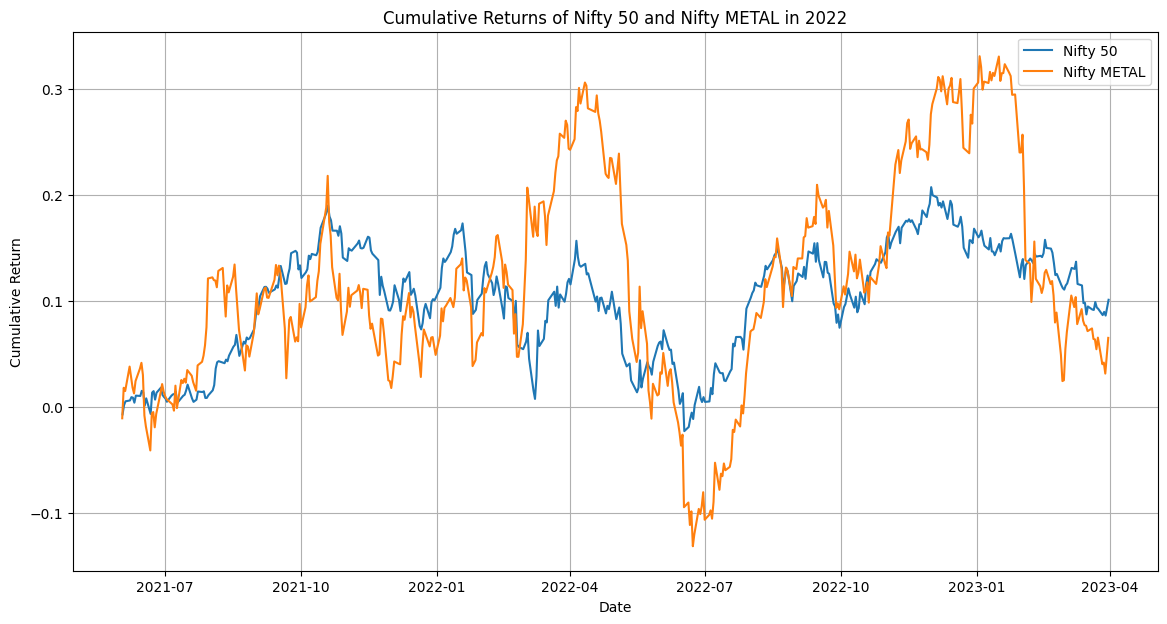

Nifty 50 outperformed Nifty METAL with a return of 10.11% compared to Nifty METAL's return of 6.52%.


In [186]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
nifty50_data = pd.read_csv(r'D:\prospace assignment\ml-25m\nifty_50_10_years_data.csv')
nifty_METAL_data = pd.read_csv('^CNXMETAL_10years.csv')

# Convert Date columns to datetime
nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])
nifty_METAL_data['Date'] = pd.to_datetime(nifty_METAL_data['Date'])

# Filter data for 2022
nifty50_2022 = nifty50_data[(nifty50_data['Date'] >= '2021-06-01') & (nifty50_data['Date'] <= '2023-04-01')]
nifty_METAL_2022 = nifty_METAL_data[(nifty_METAL_data['Date'] >= '2021-06-01') & (nifty_METAL_data['Date'] <= '2023-04-01')]

# Calculate daily returns
nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
nifty_METAL_2022['Return'] = nifty_METAL_2022['Open'].pct_change()

# Calculate cumulative returns
nifty50_2022['Cumulative Return'] = (1 + nifty50_2022['Return']).cumprod() - 1
nifty_METAL_2022['Cumulative Return'] = (1 + nifty_METAL_2022['Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(nifty50_2022['Date'], nifty50_2022['Cumulative Return'], label='Nifty 50')
plt.plot(nifty_METAL_2022['Date'], nifty_METAL_2022['Cumulative Return'], label='Nifty METAL')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of Nifty 50 and Nifty METAL in 2022')
plt.legend()
plt.grid(True)
plt.show()

# Determine which index performed better in 2022
nifty50_final_return = nifty50_2022['Cumulative Return'].iloc[-1]
nifty_METAL_final_return = nifty_METAL_2022['Cumulative Return'].iloc[-1]

if nifty_METAL_final_return > nifty50_final_return:
    print(f"Nifty METAL outperformed Nifty 50  with a return of {nifty_METAL_final_return:.2%} compared to Nifty 50's return of {nifty50_final_return:.2%}.")
else:
    print(f"Nifty 50 outperformed Nifty METAL with a return of {nifty50_final_return:.2%} compared to Nifty METAL's return of {nifty_METAL_final_return:.2%}.")


C:\Users\prana\AppData\Local\Temp\ipykernel_20056\3748125864.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\3748125864.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_PSE_2022['Return'] = nifty_PSE_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\3748125864.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

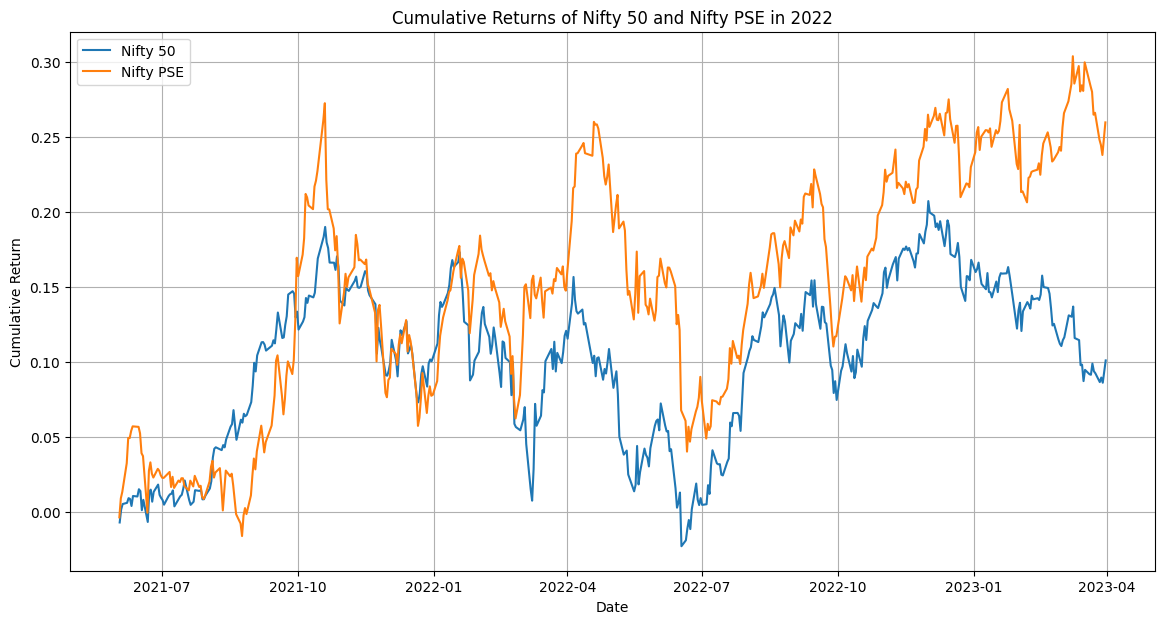

Nifty PSE outperformed Nifty 50  with a return of 26.00% compared to Nifty 50's return of 10.11%.


In [189]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
nifty50_data = pd.read_csv(r'D:\prospace assignment\ml-25m\nifty_50_10_years_data.csv')
nifty_PSE_data = pd.read_csv('^CNXPSE_10years.csv')

# Convert Date columns to datetime
nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])
nifty_PSE_data['Date'] = pd.to_datetime(nifty_PSE_data['Date'])

# Filter data for 2022
nifty50_2022 = nifty50_data[(nifty50_data['Date'] >= '2021-06-01') & (nifty50_data['Date'] <= '2023-04-01')]
nifty_PSE_2022 = nifty_PSE_data[(nifty_PSE_data['Date'] >= '2021-06-01') & (nifty_PSE_data['Date'] <= '2023-04-01')]

# Calculate daily returns
nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
nifty_PSE_2022['Return'] = nifty_PSE_2022['Open'].pct_change()

# Calculate cumulative returns
nifty50_2022['Cumulative Return'] = (1 + nifty50_2022['Return']).cumprod() - 1
nifty_PSE_2022['Cumulative Return'] = (1 + nifty_PSE_2022['Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(nifty50_2022['Date'], nifty50_2022['Cumulative Return'], label='Nifty 50')
plt.plot(nifty_PSE_2022['Date'], nifty_PSE_2022['Cumulative Return'], label='Nifty PSE')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of Nifty 50 and Nifty PSE in 2022')
plt.legend()
plt.grid(True)
plt.show()

# Determine which index performed better in 2022
nifty50_final_return = nifty50_2022['Cumulative Return'].iloc[-1]
nifty_PSE_final_return = nifty_PSE_2022['Cumulative Return'].iloc[-1]

if nifty_PSE_final_return > nifty50_final_return:
    print(f"Nifty PSE outperformed Nifty 50  with a return of {nifty_PSE_final_return:.2%} compared to Nifty 50's return of {nifty50_final_return:.2%}.")
else:
    print(f"Nifty 50 outperformed Nifty PSE with a return of {nifty50_final_return:.2%} compared to Nifty PSE's return of {nifty_PSE_final_return:.2%}.")


C:\Users\prana\AppData\Local\Temp\ipykernel_20056\1473681540.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\1473681540.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_REALTY_2022['Return'] = nifty_REALTY_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\1473681540.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

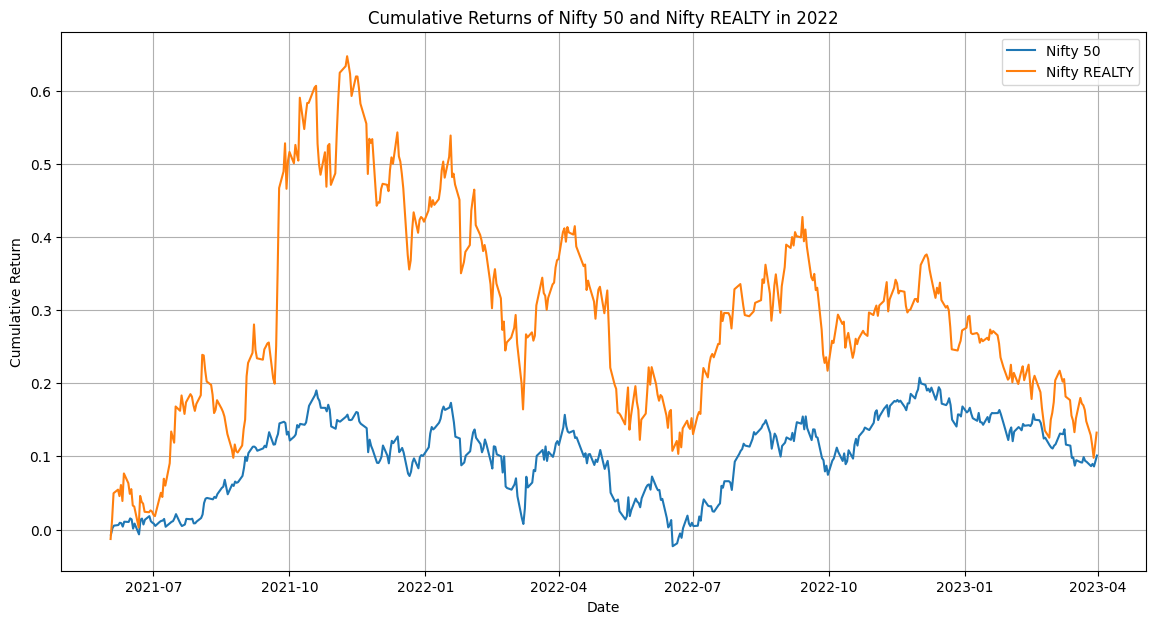

Nifty REALTY outperformed Nifty 50  with a return of 13.25% compared to Nifty 50's return of 10.11%.


In [191]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
nifty50_data = pd.read_csv(r'D:\prospace assignment\ml-25m\nifty_50_10_years_data.csv')
nifty_REALTY_data = pd.read_csv('^CNXREALTY_10years.csv')

# Convert Date columns to datetime
nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])
nifty_REALTY_data['Date'] = pd.to_datetime(nifty_REALTY_data['Date'])

# Filter data for 2022
nifty50_2022 = nifty50_data[(nifty50_data['Date'] >= '2021-06-01') & (nifty50_data['Date'] <= '2023-04-01')]
nifty_REALTY_2022 = nifty_REALTY_data[(nifty_REALTY_data['Date'] >= '2021-06-01') & (nifty_REALTY_data['Date'] <= '2023-04-01')]

# Calculate daily returns
nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
nifty_REALTY_2022['Return'] = nifty_REALTY_2022['Open'].pct_change()

# Calculate cumulative returns
nifty50_2022['Cumulative Return'] = (1 + nifty50_2022['Return']).cumprod() - 1
nifty_REALTY_2022['Cumulative Return'] = (1 + nifty_REALTY_2022['Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(nifty50_2022['Date'], nifty50_2022['Cumulative Return'], label='Nifty 50')
plt.plot(nifty_REALTY_2022['Date'], nifty_REALTY_2022['Cumulative Return'], label='Nifty REALTY')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of Nifty 50 and Nifty REALTY in 2022')
plt.legend()
plt.grid(True)
plt.show()

# Determine which index performed better in 2022
nifty50_final_return = nifty50_2022['Cumulative Return'].iloc[-1]
nifty_REALTY_final_return = nifty_REALTY_2022['Cumulative Return'].iloc[-1]

if nifty_REALTY_final_return > nifty50_final_return:
    print(f"Nifty REALTY outperformed Nifty 50  with a return of {nifty_REALTY_final_return:.2%} compared to Nifty 50's return of {nifty50_final_return:.2%}.")
else:
    print(f"Nifty 50 outperformed Nifty REALTY with a return of {nifty50_final_return:.2%} compared to Nifty REALTY's return of {nifty_REALTY_final_return:.2%}.")


C:\Users\prana\AppData\Local\Temp\ipykernel_20056\1506243984.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\1506243984.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_SERVICE_2022['Return'] = nifty_SERVICE_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\1506243984.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

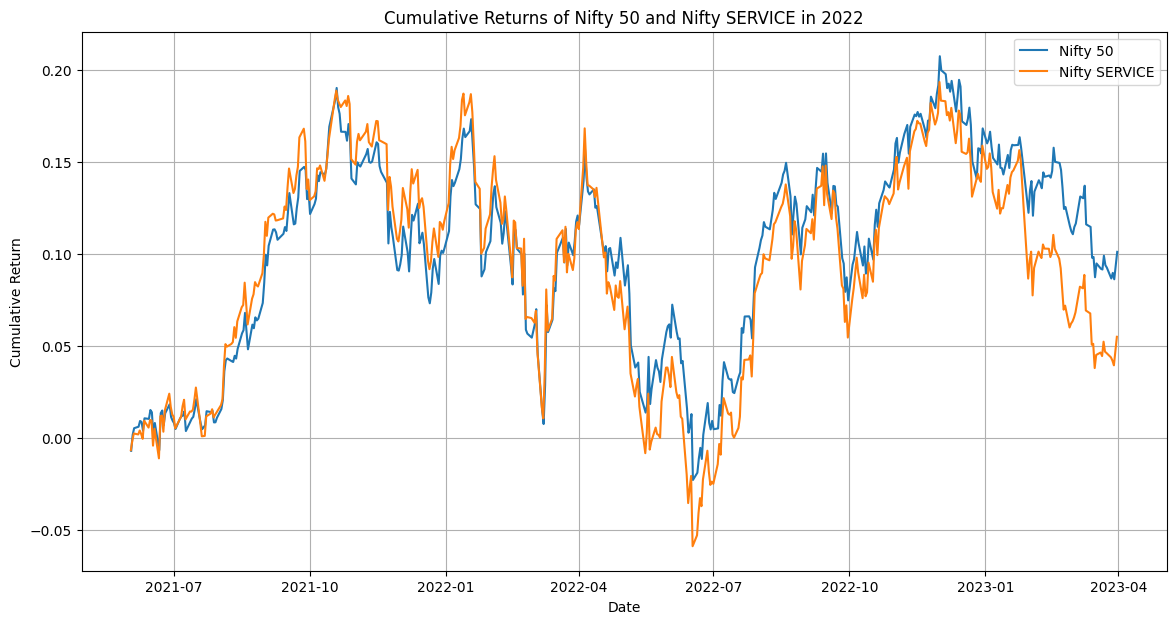

Nifty 50 outperformed Nifty SERVICE with a return of 10.11% compared to Nifty SERVICE's return of 5.50%.


In [192]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
nifty50_data = pd.read_csv(r'D:\prospace assignment\ml-25m\nifty_50_10_years_data.csv')
nifty_SERVICE_data = pd.read_csv('^CNXSERVICE_10years.csv')

# Convert Date columns to datetime
nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])
nifty_SERVICE_data['Date'] = pd.to_datetime(nifty_SERVICE_data['Date'])

# Filter data for 2022
nifty50_2022 = nifty50_data[(nifty50_data['Date'] >= '2021-06-01') & (nifty50_data['Date'] <= '2023-04-01')]
nifty_SERVICE_2022 = nifty_SERVICE_data[(nifty_SERVICE_data['Date'] >= '2021-06-01') & (nifty_SERVICE_data['Date'] <= '2023-04-01')]

# Calculate daily returns
nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
nifty_SERVICE_2022['Return'] = nifty_SERVICE_2022['Open'].pct_change()

# Calculate cumulative returns
nifty50_2022['Cumulative Return'] = (1 + nifty50_2022['Return']).cumprod() - 1
nifty_SERVICE_2022['Cumulative Return'] = (1 + nifty_SERVICE_2022['Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(nifty50_2022['Date'], nifty50_2022['Cumulative Return'], label='Nifty 50')
plt.plot(nifty_SERVICE_2022['Date'], nifty_SERVICE_2022['Cumulative Return'], label='Nifty SERVICE')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of Nifty 50 and Nifty SERVICE in 2022')
plt.legend()
plt.grid(True)
plt.show()

# Determine which index performed better in 2022
nifty50_final_return = nifty50_2022['Cumulative Return'].iloc[-1]
nifty_SERVICE_final_return = nifty_SERVICE_2022['Cumulative Return'].iloc[-1]

if nifty_SERVICE_final_return > nifty50_final_return:
    print(f"Nifty SERVICE outperformed Nifty 50  with a return of {nifty_SERVICE_final_return:.2%} compared to Nifty 50's return of {nifty50_final_return:.2%}.")
else:
    print(f"Nifty 50 outperformed Nifty SERVICE with a return of {nifty50_final_return:.2%} compared to Nifty SERVICE's return of {nifty_SERVICE_final_return:.2%}.")


C:\Users\prana\AppData\Local\Temp\ipykernel_20056\3780366520.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\3780366520.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nifty_BANK_2022['Return'] = nifty_BANK_2022['Open'].pct_change()
C:\Users\prana\AppData\Local\Temp\ipykernel_20056\3780366520.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.


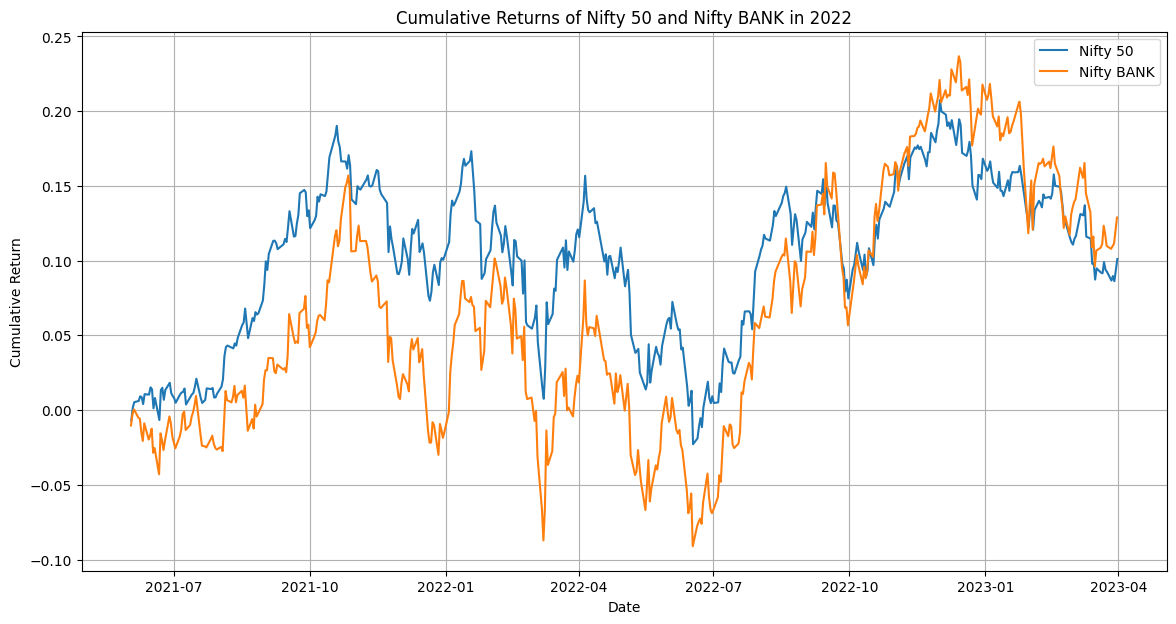

Nifty BANK outperformed Nifty 50  with a return of 12.88% compared to Nifty 50's return of 10.11%.


In [193]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
nifty50_data = pd.read_csv(r'D:\prospace assignment\ml-25m\nifty_50_10_years_data.csv')
nifty_BANK_data = pd.read_csv('^NSEBANK_10years.csv')

# Convert Date columns to datetime
nifty50_data['Date'] = pd.to_datetime(nifty50_data['Date'])
nifty_BANK_data['Date'] = pd.to_datetime(nifty_BANK_data['Date'])

# Filter data for 2022
nifty50_2022 = nifty50_data[(nifty50_data['Date'] >= '2021-06-01') & (nifty50_data['Date'] <= '2023-04-01')]
nifty_BANK_2022 = nifty_BANK_data[(nifty_BANK_data['Date'] >= '2021-06-01') & (nifty_BANK_data['Date'] <= '2023-04-01')]

# Calculate daily returns
nifty50_2022['Return'] = nifty50_2022['Open'].pct_change()
nifty_BANK_2022['Return'] = nifty_BANK_2022['Open'].pct_change()

# Calculate cumulative returns
nifty50_2022['Cumulative Return'] = (1 + nifty50_2022['Return']).cumprod() - 1
nifty_BANK_2022['Cumulative Return'] = (1 + nifty_BANK_2022['Return']).cumprod() - 1

# Plot cumulative returns
plt.figure(figsize=(14, 7))
plt.plot(nifty50_2022['Date'], nifty50_2022['Cumulative Return'], label='Nifty 50')
plt.plot(nifty_BANK_2022['Date'], nifty_BANK_2022['Cumulative Return'], label='Nifty BANK')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Returns of Nifty 50 and Nifty BANK in 2022')
plt.legend()
plt.grid(True)
plt.show()

# Determine which index performed better in 2022
nifty50_final_return = nifty50_2022['Cumulative Return'].iloc[-1]
nifty_BANK_final_return = nifty_BANK_2022['Cumulative Return'].iloc[-1]

if nifty_BANK_final_return > nifty50_final_return:
    print(f"Nifty BANK outperformed Nifty 50  with a return of {nifty_BANK_final_return:.2%} compared to Nifty 50's return of {nifty50_final_return:.2%}.")
else:
    print(f"Nifty 50 outperformed Nifty BANK with a return of {nifty50_final_return:.2%} compared to Nifty BANK's return of {nifty_BANK_final_return:.2%}.")


<head>So the return for NIFTY 50 was 10.11%
<br> Nifty BANK 12.88%
<BR> NIFTY SERVICE 5.50%
<BR> NIFTY REALTY 13.25%
<BR> NIFTY PSE 26%
<BR> NIFTY METAL 6.52%
<BR> NIFTY MEDIA -3.70%
<BR> NIFTY IT  4.27%
<BR> NIFTY AUTO 15.71%
<BR> NIFTY ENERGY 11.85%
<BR>
<BR>Thus NIFTY BANK , NIFTY REALTY , NIFTY AUTO AND NIFTY ENERGY OUTPERFORMED NIFTY 50 AMONG THESE SECTORS